# Kaggle: Titanic - Machine Learning For Disaster

## Dataset Description

### Overview

The data has been split into two groups:

    - training set (train.csv)

    - test set (test.csv)
    
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

| Variable | Definition                                 | Key                           |
|----------|--------------------------------------------|-------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes               |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd     |
| sex      | Sex                                        | male, female                  |
| sibsp    | # of siblings / spouses aboard the Titanic |    -                          |
| parch    | # of parents / children aboard the Titanic |       -                       |
| ticket   | Ticket number                              |     -                         |
| fare     | Passenger fare                             |        -                      |
| cabin    | Cabin number                               |             -                 |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

pclass: A proxy for socio-economic status (SES)

    - 1st = Upper

    - 2nd = Middle

    - 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.



# Importing Necessary Libraries

In [412]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import LabelEncoder

# Loading the Data

In [413]:
train_dataset = pd.read_csv('train.csv') # read the train.csv into train_dataset
test_dataset = pd.read_csv('test.csv') # read the test.csv into test_dataset

# Observing the Data

In [414]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [415]:
train_dataset.columns # check for columns names 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [416]:
train_dataset.dtypes # check for column data types 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [417]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [418]:
train_dataset.isnull().sum() # check for count of null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [419]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [420]:
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [421]:
test_dataset.columns # check for column names 

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [422]:
test_dataset.dtypes # check for column data types 

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [423]:
test_dataset.isnull().sum() # check the count of null values 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Feature Engineering 

## Feature Selection

Selecting the right features is crucial to building an effective model. 

### Renaming the Column Names in the Datasets

In [424]:
# Create a dictionary to map the old column names to new column names
column_mapping = {
    'PassengerId': 'PassengerID',
    'Survived': 'Survived',
    'Pclass': 'Socio-Economic Class',
    'Name': 'Name',
    'Sex': 'Gender',
    'Age': 'Age',
    'SibSp': 'Siblings Or Spouses',
    'Parch': 'Parents Or Children',
    'Ticket': 'Ticket Number',
    'Fare': 'Fare',
    'Cabin': 'Cabin Number',
    'Embarked': 'Port Embarked'
}

# Rename the columns using the dictionary mapping
train_dataset = train_dataset.rename(columns=column_mapping)
test_dataset = test_dataset.rename(columns=column_mapping)

In [425]:
train_dataset.columns

Index(['PassengerID', 'Survived', 'Socio-Economic Class', 'Name', 'Gender',
       'Age', 'Siblings Or Spouses', 'Parents Or Children', 'Ticket Number',
       'Fare', 'Cabin Number', 'Port Embarked'],
      dtype='object')

In [426]:
test_dataset.columns

Index(['PassengerID', 'Socio-Economic Class', 'Name', 'Gender', 'Age',
       'Siblings Or Spouses', 'Parents Or Children', 'Ticket Number', 'Fare',
       'Cabin Number', 'Port Embarked'],
      dtype='object')

In [427]:
# Plotting based on the selected feature
def plotting(feature):
    # Set 0 to Deceased and 1 to Survived and get the value counts
    Deceased = train_dataset[train_dataset["Survived"] == 0][feature].value_counts()
    Survived = train_dataset[train_dataset["Survived"] == 1][feature].value_counts()

    # Create a DataFrame from the value counts
    df = pd.DataFrame({'Deceased': Deceased, 'Survived': Survived})

    # Plotting based on the modified index
    df.plot(kind = "bar", title = f'Survival Rate Based on {feature.capitalize()}')
    plt.show()

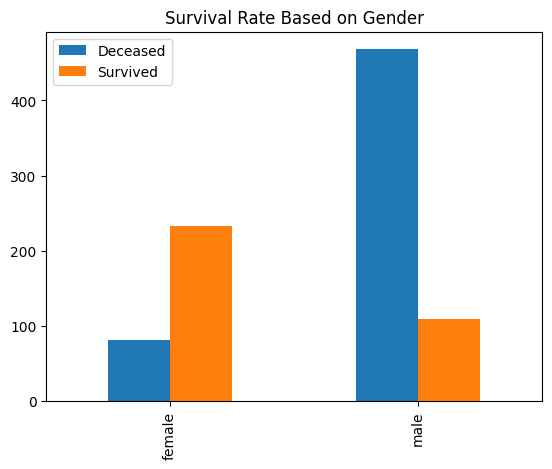

In [428]:
plotting("Gender")

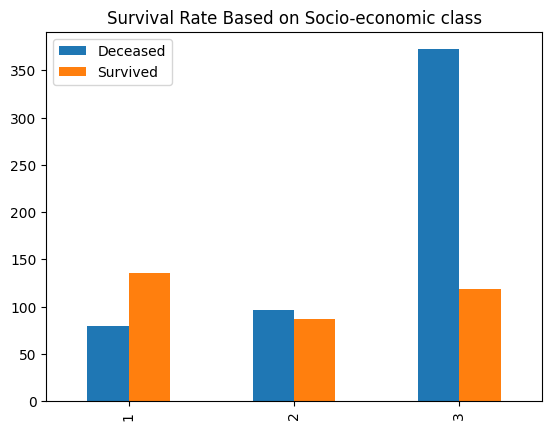

In [429]:
plotting("Socio-Economic Class")

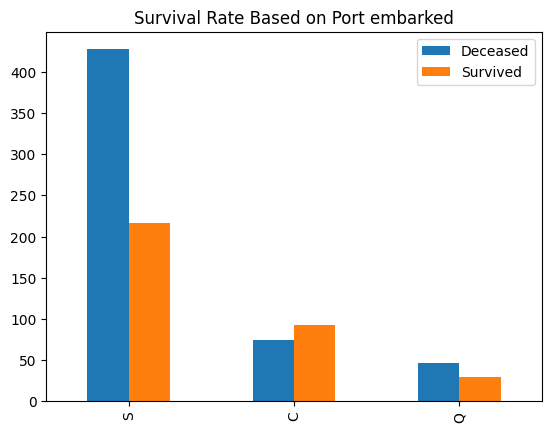

In [430]:
plotting("Port Embarked")

Taking a look at the Age column:

In [431]:
train_dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

We will create a new column called "Age_Group" to categorize the ages into above and below 50. 

In [432]:
# Function to categorize age as "below 50" or "above 50"
def categorize_age(age):
    if age < 50:
        return "< 50"
    else:
        return ">= 50"

# Create a new column 'Age_Group' and apply the categorize_age function to the 'Age' column
train_dataset["Age Group"] = train_dataset["Age"].apply(categorize_age)
test_dataset["Age Group"] = test_dataset["Age"].apply(categorize_age)

In [433]:
train_dataset["Age Group"]

0       < 50
1       < 50
2       < 50
3       < 50
4       < 50
       ...  
886     < 50
887     < 50
888    >= 50
889     < 50
890     < 50
Name: Age Group, Length: 891, dtype: object

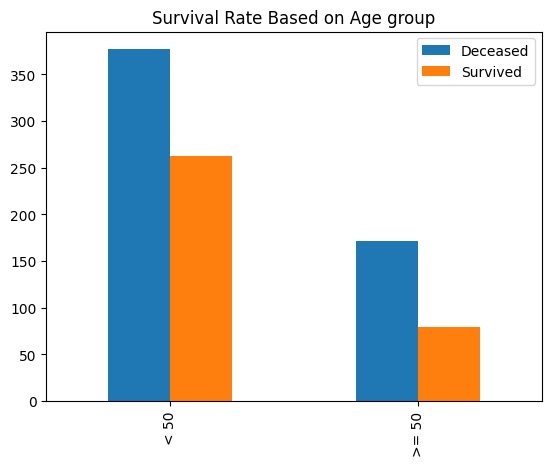

In [434]:
plotting("Age Group")

Since PassengerID, Name, Siblings or Spouses, Parents or Children, Ticket Number, Fare, and Cabin Number are unique for each person, the features we select are Socio-Economic Class, Gender, Age Group, and Port Embarked. 

In [435]:
features = ["Socio-Economic Class", "Gender", "Age Group", "Port Embarked"]

Splitting into X and y based on selected features:

In [436]:
test_dataset.head()

,PassengerID,Socio-Economic Class,Name,Gender,Age,Siblings Or Spouses,Parents Or Children,Ticket Number,Fare,Cabin Number,Port Embarked,Age Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,< 50
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,< 50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,>= 50
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,< 50
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,< 50


In [437]:
# Create the feature matrix X using the selected features
X = train_dataset[features].copy()  # Use .copy() to create a copy of the DataFrame

# Encode categorical features (e.g., 'Gender' and 'PortEmbarked')
label_encoder = LabelEncoder()
X.loc[:, "Age Group"] = label_encoder.fit_transform(X["Age Group"])
X.loc[:, 'Gender'] = label_encoder.fit_transform(X['Gender'])
X.loc[:, 'Port Embarked'] = label_encoder.fit_transform(X['Port Embarked'])

# Create the target variable y
y = train_dataset['Survived'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\noaht\AppData\Local\Temp\ipykernel_18988\1624436681.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, "Age Group"] = label_encoder.fit_transform(X["Age Group"])
C:\Users\noaht\AppData\Local\Temp\ipykernel_18988\1624436681.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Gender'] = label_encoder.fit_transform(X['Gender'])
C:\Users\noaht\AppData\Local\Temp\ipykernel_18988\1624436681.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always

# Create and Train Model

In [438]:
# Create a Random Forest classifier with 100 trees (you can adjust this parameter as needed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict Target Values on the testing dataset
predictions = rf_model.predict(X_test)

# Observe the Predictions

In [439]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print a classification report (precision, recall, F1-score, etc.)
print("\nClassification Report: ")
print(classification_report(y_test, predictions))

Accuracy: 0.7932960893854749

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179

